In [27]:
import pandas as pd
import numpy as np
import cv2
import os 
from tensorflow import keras
import urllib.request
import matplotlib.pyplot as plt
import tensorflow as tf

In [69]:
model = keras.models.load_model('../model/dnmodel_95.52_20230606-152918.h5')

In [16]:
def test_img(url, model):
    res = urllib.request.urlopen(url)
    img = cv2.imdecode(np.asarray(bytearray(res.read()), dtype=np.uint8), 1)
    img = cv2.resize(img, (256, 256))
    img = np.expand_dims(img, axis=0)
    print(img.shape)
    return model.predict(img)

def test_img_local(path, model):
    img = cv2.imread(path)
    print(img.shape)
    img = cv2.resize(img, (256, 256))
    img = np.expand_dims(img, axis=0)
    print(img.shape)
    return model.predict(img)

In [70]:
def get_prediction(url='', model=model, path=''):
    if path == '':
        path = keras.utils.get_file(origin=url)

    img = keras.utils.load_img(
        path, target_size=(256, 256)
    )
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)
    score = tf.nn.sigmoid(predictions[0])

    return predictions, score

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format([np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 86ms/step

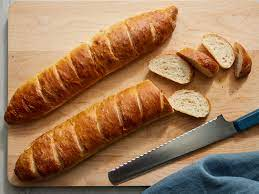

(array([[1.]], dtype=float32),
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7310586], dtype=float32)>)

In [92]:
get_prediction(url='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgVFRYZGRgaHBweGhwaHB4hJRocHBoaGhoaHBocIS4nHCErHxoaJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHxISHjYrJCw0NDQ0OjY0NDQ0NDQ0NDU0NDQ0NjQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIAMIBAwMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAFAAIDBAYBB//EAD8QAAEDAQUFBgQEBAYCAwAAAAEAAhEhAwQxQVEFEmFxgQYikaGx8BMywdFCUmLhFJLS8RUjU3KCohZDByQz/8QAGQEAAwEBAQAAAAAAAAAAAAAAAQIDAAQF/8QAJxEAAgICAgICAQQDAAAAAAAAAAECEQMxEiFBUQQTMhRhcaEiQpH/2gAMAwEAAhEDEQA/ANXYYdUg7EA5mqTXQmtBhQyyaVIriim+yZrzqfFPDzr5quGlSNBULZekTB519U8POp81C0LqNsFInDzqV3fOqiATmhG2akSB51Pmu7x1TA1djgtYKHbx19V3eOpTQE4BAx3eOpSJOp8Ut1dDTwWMIHifFO3ufiuBp4LsI2YQeV3eOq5u8Uy2tmMEl3glc0l2wqN6JJK7VULW/gfK2Tzw6BQG/vJp3RGGc8Z/ZTeZeOyiwyYVJOvmoH3xoMF3rTmckOdeXPEEkUmucdMEA25ei1obQOM1nI4f3JU/uk30qKLCvJtN85HzKW8ePmqGwQ4XdgfO9FfEkeUK8SulO1ZzyVOju8eK4XFc3uCaX8AjYKOkrh6rhtAuF/NC0GmdPgmuXJKYHg8VrDQ8lNc48U0v6JszVA1D98pKGfdEkeUvYOK9FK+2+4wu0wV1gogW3H92EdYMPuq5vBLF5JAF3dCaGru7molhGlVOxyjDdU9rAmQGdaJTw1NBXaoAHEgLodwXAxO6rGEH8E4ELg5hOaOIWMdATgFG97WkAxJwTbW1AbLfFLKcYhUWyZxAxVa1vYEBuJMVQ997kSKzxTaPYWkVikZHKOq5pZpS/HovHCl2ztpavJPeJGmCayywMqpdb1LCXfODgB0kj3RNtNosbIBEk0BpnBM+aWME3ci2ukW3ugkBsmMqnyVS8uc2oqACSTlzz/sh922zL2AkSXxORBkSPHlIVftDe32T3BjhBqJyyIFOtcncE3SfQUndD7ztkNkGWk0kxGfywhxs/wCI3XNcN4E7w1yiMzQ/VA7faLXnCv1qFZ7OB77YMBMPxIyDcT4Hxhbjb7Gk0l0eo3UFrQDkArUyo2YLgdGp5ZLq0cG2PcYXCOCQtOB8E7eWMRuCjZ5qeAU11mFjHQUgEwghOD9UUwUNcJ94rjmhSYpposYZASTpSRoxlNt4LRsHJZ7bYpPArRNwVMvglj8nQ3gnNC4QnNHFRLDgOKQYutTkQHQF0NSaE8BYBwAJ4Sa0pPcBUmEG0u2arHgKK8W4YK++Kr2e0O9GNc4+gQntBfWPZuhxaTMxNCMjGC555003Flo4m5JNF4bQ3iQDhmql/eQWmTuYUPkR7xWWul6fZ2TmvO9FWkUJqcczTJGbrtEPu727pBYAY4A41wkeEqFX5OlwUe0iZ7wKiuAIGXHxKgs9ohhLZiDPKCPqs/etpAgFjwPzDjgaZn7FDbxtAiWlm8DBB8Z1VYha9mk21f8AcfvtMNfDmjmJ6adFnr5tEvhwxyE4EGnLJMvd6L7Boxc0uHQ1bX/dTqgQfEjMnlXknStWBf49BG1vU7pwNCeY00qiW3L3v7jyC07ogg1rIJ8oniswHEY1K7a2j3kZ4eSKh2BysnuzGul2FR48FvuxNx3Q97hG9AHLn4LNbE2S5xbI5CNc16ZcrtuMDAMB56wmWyc5WqLjBSlE8ArjG9F0E6gnP3RNZCiRvJNe5xMNbSMeOi462gEnJULhthj3us3CDMt/UNef7ISktWZRdWkWbSzfM7w6gdcsFEy2IO68VGJFR4EeiuOYcabusnriFHaB9Ic0inzZ9RgUeNdoCl7HCokEEJRwVV43O82d3Fw4atpjwzrwVa87SLXkAgtjDXCsoOajsZR5aCRATSeKju16a9u83kRm06FSHiqJ3oVqnTOT7lJN3RqksKZnbvy9EYbb8vD90H278qvhgoYkgU6itVTN4EwrZa/iDoPfVPbbngqrQcgp2E5nwXPZeicW5z9E/wCKdB76qIJ28jYKJ2PPBPFoVCx0qnfNohlAJ1/ZJPNGC7GjBydII3i9bjS7T3qs3tPaZxmVIbbfa9gce8DBOIJwPL7LK2O1QZa/ARNMDMEjguRylldvR148aj/JobhepktdPAnA6KrtxrW2ge127vgOAqe8AQeh3YJynRDrVxs+8KEgVBxGIVe8Xt9rZzvAvaQWmk/M2W+Ta80/FaGe7Q61vW8CWxVrjBOmMZ9OBTtm31m/vHuSCHAEnukQcBWDB6IBfLGTvsMCZ5Oiv1VC2vBY4EV1/snjjUtMDlWwpfLLce9pcCJEmtZFHRlND1Q61ta0cMeiuPvotGw9g3gIDhSMThmP3Q/4Mn1oAqRXvYjfolsLRwJBw0yxn3yVe1iZmQajXqng5NEnX3irt22aXd5x9/RPrsRyKbLNzz3R4o5svZtRmUQ2XsreeGxGfQaDM+C2Fz2axgpMkSdDzOWdEtt6FclHZFs2yFm0TjnSY8Fdbe85IxxaR6jzUjiwO3RMxoY8cupXLVhqCHEYd1oMTnn7K3F+xPsXoCjtexzjZu/ynCRLor1ju+6q0LQ/NOQr6IJ2p2M20ApDm4OiD1AGCx102rbXZ2451MpqDynBI8PJ3dsrHJFLpHqdteS5gaSYOdMeqzG2Lnas/wAxhB3ay0VaeS5YbdFqzdAAflNZ1I0NSn2O0iaWjwxzZmkTGFXTnwJoUtK6KxSq0absxtxl5Zuuo9sFzZONCHDgT9kegEzH9uvovLLS13LVtvYGHgyQaB9agwIrrReh7N2i282O+xzmkiHQBvMfSRGsq2OXg5c2KnyWizaP+bh5GJ9Fir8P85oacHAgasNTB5HArYjut3nN3XSQCR8xMAOcGjPyXnt8vwtL+d091h3JGBLZ3vA0/wCKM48hcb42FLrfHWN4MHuuEEehjz5FaR96NIPpgvP9v33dtAAch4/bBaLs1fDaMIdUsIjkZjzBUouUXXg6JxTipBr4r9fIfZJOSVbZHoCbd+XxRLeQ3bp7viiBJV8/g58HklB/dSsaqzLSKKZj1zuSXbOimWAFx1q1sScVFeLwGsLqGImcgTE+iyt7vZLw/elswa5mmGWS5p5rdR/6Vx4uWzUXe/h7izDER1AnzWcvjnjeDu9ukgmZIIOapt2gWua9v4e67x9+CXaO+7lq20YQG2rRvHLeFQeqnGDl+WzoSUH0NO0Cwh4rBgjUYxI9eKHbdDQ9tpZxu2gMgj8R+adDTDiuXy+tf+l5yGuo6qhbWhdZusyYIMt/3DETgJ9QFeKpmkR2D3Bp70NGFcNRyn1THNl3dMbwyOcKiLRwoW0+qVm8xB6Kzi9ickWX3hzi6KETIOYzBCTrAuhwGPvqlbGYc6jqczl6UU1lZPeN0d1vDPmfpggv2Ek0iF8NpidB9SpbK6PeZIgaIpctkgZI3drhhAWtIRtsE3TZoajF22dOSK3bZhzEBEfgBo5JXbBaRTu1vZWDwbQgB3d3jlWeg4o+WAgEVGoMjDhj74LzzbgdaOwO6DA049UJuO0bzdnE2TyG5sNWn/icOYgpoyFlC+z062NoIDADlQgBv6jMSOS6+0eK7o64jqFmdndt7F5DbxZ7jjEuAJbORjEHDLJaq7WzHtD7J4e0fikOjwEhMiUk14B20pIkgEZma7tKkc5HRYbtXsoFheBhXLXgvRb3ZvgghrpwBMY4AwNaCmWayvaVgZYuB3SREjnOE48/ui3XZobPObhfHMMO1x+6LPBfDmvLT5VxjRDGXYwScySu2b3MwqNPeCMkm7WysZOJMy0c0hswRTHKnvBHLtt21uzw+zqC0b7TnjBPHdhCrNvxCIaZGZRJl2nuxJU5Vdso5OSoMXjt1bWzHMZZbhcI3y4nd4tGvE4aILsJpZaHrnyMopZbN3LMvIqTRAbe9/CLxB7wMRqQBh0800ZXom4pIbtC8NdbOdiJwyMDdE8BC2fYtxdZveTJc+JwndaPKSV55dLi+0cGtbAJjxXrmz7k2ys2WbAAGiAPU8STJnijJJG5Wi1vHXyKSfB4pJaFsBbfPdHJFGkIVt75eiJ3q8CzYXuPIGKnIK3yHVMjgV2OtLRrRLkKt9r1JbgBqgt6v7iXAuEuk4444dEJdfC2A4QJry+682XLI/2PShjUV2bbZl+Fux7CPma4ERmQY6jFZW4tLXvY8ggyIJzpXhj5qbs7tJrHuHzNMECoNNI4E+FFR2taus7w+pcx53hJAkEUM4EjXnrWkcdKkZvixWz92QTXOcYy8PsprF7LWzdZuImJZ+o4xz48UNvLg/vMINM8eO8OuX7IULV28S0wRWBl0KrHHYHPwWLW2d8oJkEiD+E8OBTLO9uGLWkcoITrS03+8fm9U0Mj5sdNeeipS1QttDHAuOM6cuOinsW5NEnXL91PdbgX4iBotDdNnBsAAeCVtC36Bd02aJ3nVPFHLtdQMB5K7Y3MUkeCMXbZzQJKRysXpA67XOdUbut0DRhVcfaMY2aHKByVG3tbR0A90GsDMZSVOWVR/caMHL9gu57BQmvvRDrS/F0hrYFRJrKnulm0AYadVVtYa9zad3lmouc59aHjCKY6zG8N1w3mnI4eCD7S2MBlLTg76Hj6ojaXktqBOY+3NNdtNpaW4yMDnqOYxVILiNKN6MffNjnKEPsfi2Dt+ye5jtWkieYwcOBW6tbqQS0uDsTIigJO6CMcFTGwzavgYD5joCrRmScUD7p28vDW7tqxlro6rT4AQfAKhtHbVtegGua1jBWGiprOJJ8oWxu3ZSxaRLC4jWTz0b5Jf+PsJ/8AwDG5f5hqMKgCJ5lU79EbjZh2WAiBFFwbOk5LaXnsqKuY4AflxM/7pMqhY7NdvhpEHP3ohbWwqnod2e2U0SXAVED6n3qiTtkMa7ePAeJgDxPmiNjYbrQ0QnR7EpWr2awbtFncgCn91lbxs0OOFVtL8wlg58elAq902dg54Eiufs4opUGypsLY7WAPOOXBHBOUJbhyKcxhTIRnd1JLd9wEkwoB282gQXtbfS94Y0gBkHHPM+cdEW7S226wu0BI5jALBXu+Wlq3edlJBoJBkkcc6KnyO2kb4q3Ilc7eO6XEEgxzgxjSsBQNv5JO9R01jCRQnUY+ZhUHXsgiKxUYc4xPjyVi1t2kB7Wh0iHNOfCRUEY41CmsdKmdkp+TtvaFxo4CfXLr5q9d7yH2Zs7R3eb8pOh/DOdajmgD3gnu0GhMx10UlhvCMUzh0JyssPs3NNDMcQaJ4s950jxjDmpg5oHfHeyAmY0NaKzd7B1pSA1v5R9TiUtsFpFRgrutrxj01RO47PA7zqnr7KL3HZzREBHLrs4iuXvBTcgfyDLndQYEH+Uo/dri2JKsNDG4QSMs/wBkhLyPyz5Vr4x4KE8iXW2Mk2O3mNFIk0HExQKsbVznAUAAIjKfYVW0eXFrZpOJMROfoF02pHeyMxzEH6qLlKa70VjBInv26yzE8YjWZ8VBZWvda4mhEjhOXvVWbxu2lgRm2tDHUeI8UGsL63cwymg0J3uPvROoUFSvou2t+3CK0oafVd2tfA02doKttGbruYpPCoWd2heQZDYIypWCfZ4JlptDfurmk95jjB/SYdjza7xVIo0vDCdvfo70iDIicNJ0pVBL7e5MgwaSNDrwp6qk2/F3104R9lRt71qeH1+6aON2Hkkbfae0HMtbO1aJaWDfAzBgkHxkHULdXRzDZtfZVa4NI5HOuB4c14ttLaW+LOKFrADXH3AWt7HdpvhWT22suY0tMgyWBzoc4D8QktMCoqQnxxce2c+X/JdeDe27i0VLZwEik44dMZUD3vaQXN3gTXdbO7GZIOHFcuW07vbg/DtWuiJDXRFZgxUE1xV1zRoTxEdFXfk5NbK4IeJAgjEECSPyma1nxCqX+xEbzRuv/DnmKHhh4q8+GmDMGBiTJceOGYxURDA2DLQKSSaiNc6ZrSVqmaMqdoGXe1L2hwpIw45hT2QOfooLj+OKDfdFOisOJ49B91KOrZd76Ol2WKiIccyOXin108SnB3LxTUYjYDxHipWA5n1+6Ug5hR3i9ssxvPcGjU58tU0Y+hJS9k3TySQZ3aezys3kZHdFfNJX+ifoh9+P2ZrtzeiG2TQMS49QBHqVijfHB0yYMEiYrqCMDxC3naljXgNPMHQ5ELEWmz3gwSCjNK7ZTDOo0iLeZBBmccKVyg4VUVJorQuh4dE+y2eTkUmi3IqtYNR0Vu7WT8GiJzRW67MAqQid3uBODVOUgq2DLls0CpqUeuGzS40ERmiNx2YAN58ACpJ90V9l7bIYwVPDLWD9VCeRLY6i3o7d7qGRvuBOmfQZqC+bRcQAygmpGMT5KR12LyT+KRBPConhw4qlfwGODYIO6N4AzBmvNcs8spLrpFowV9kl2bukOEnUBGNn39jhhFYjqQswbyWEzhn78PBPsbxWjhw1xpBHEe5Qgkiko2WrS0aHluQkSDXPJUje+6QMAax1h3GkV4KTax3N12Jc0EniRU8pQO0vebYa4joRyOKpGFIVStBjZV/75YSe8CBziQP5oQW87Ucxz2ULWne5hwGfSevBUzezIdEbpBpkRXyQzbN5a9+82oMiY6kefourHC+mTm6doI3i+teJAE58KD6z4KmL0GNeMyI86ISHOFRmpyJFc/eCr9SX8CPL0PbeTFM8U11mSJPn7qn2bMmiupVqzuRNSCeabpEXNsriMhPOgVuzY4iCYBy/bNXbK4xGA9UXbsd4EgZc0kmkZJsy5uz2neYSCMCCQehFUXuHa++XeheLRuj6no4V8ZU1pdYpEn3mqdrc5/b7lFNPYHE1tx/+SbEt/wA2yexwGDIcHcA6RHULt47cNtu5dmWge8gAva2Gg4kAE1xWOu+x3vdusYXHOMuZNAOJWo2Vs5l3h7u++D3QXAN0k58hHNPxb0TfGOzTXKzIaGCSQKn1JrTVZq+9pnNtgAB8JryHGS4vbgXNOQ/ENYFapu0L294DXulrZgUEcaYniaoDbNVI4Ut9knmb10ejMexwBAkESDiCDgQUy831tmN55a0eZ5AYrzy7361sxuse5rdJoOQOHRBL1tK1FsQ57jWhJyNRBPhKEPjcpU2GfyajaXZu9q9rIENAbxcJcf8AazLmaLJXzbD3mRM/mcZd0yb08UOccz1URtcmieS7448eJddHnyyZMr9khE1JJOa6oe/oFxb74ezfpsno3W0HbxMqC1uHAeEqzem16j1WlddwR+32XnZno9HB5Mc25cD0CsWNwyhy07bo3QKQWbWiaABQcjqQLueyc92Oatb7WksZDnAgGMJORdrw9FRv+1AXBgJa3PUidchGUSoLEsLXNYQIkgitSQY5UyUJT8ItHH5YUvLHNYHPIguA3dK1GuGqsse0sLhEggDDr1VS1Ln2EjvPDqEg1FKHxx4DrRsXkENJ3TzzH10XO9+yiXRdF9LTJq2SJzxxp6Ju2x3g6oDqEnIj+/khu0GkVEEEyQKSBgZ1g4q7/FfFuzmH5mDeg6D9jPRMo8lQW67Bd5c6CRkAJjTj7xQ03hwgkwRJBHmo7S8vJnMjvY1IpvBDLa8kEjEaacveSrDG9Gc0Hdp3tz7ENNS2c8QaivAz4rOtvmUzQ45RoutvUCh8ahVvhtmc8xlzByXRCCSpkJTp9DxeQaZLgc4BzRu7szUDQYEiRgErKzn5RJ1RC7bNky6vgqdIk8jYNsmE4CeJ+yJXbZs4ovd9nNGAV6zuQOXqg5CVewKy6gHwRBtnGSLWGzhjE9VcZswGJFPfFK5DUDdlXKXB7hICN4iThorNldQGkNaaCuOGpOSQsGAV7wIyLmweMiT5c0FCUtGlOMdg8XP4lGsJ5DDi45DmuM2JZNq8/E/S0loHA0k9I5ok+0mBSmEADyAx4qG0tQF0QxKO+zmnmctdETqNDQGtAwDWho4mGjHiqNuVLb26o29orIiyvbFDbw5K+7RYzE10z8EOL7S0PcZA1P2CzklsMYN6Jrd7YqUHvzBaRugyM9RotFc+zL31eCecgInZ9nN07oaI96lTedL8SscF/kYu77PLqPJRa7bNgUC2F37PMFXDzKJWVxY3BvvxUpZHLZWOOMdGLbsxx/CfBJbz4LfyjxKSW2N0ZnaLCCJ1HqtPuoDt7FnMeqLi2doFTN4JYfJYDfdUPvF7a9u6ySTQHITz+Y8MPRVNpbUO8WNgECu7jJwb9eoUeyg1zoIIM1oRJAzOq4Ms3pHbCHlgMvO9MHfBJNcamvgc1bs7uYa8GAW+Rx8Cht/vO5aOGD2udXgSSKZ8wrd2t+5utqKudkJME40GEdUOFKy6kaTZb3/BcwmTBjlMdMRHJArw/faSCQ9gMiPmEioORBHrjNSOw7wA4DfBElsccvQIFtq9fDtXtIIBII4ONJHAyfJNGLfQjlUiG1vjyDOsyTFeSl2TtcMfDu808cWmhBGv1CE3i9iaCNRlxCpG068DqqKBpTQT2274VpLHbzTNAfwnA80JtXFxVm83hpgkRTOvgM1BZhzz3RA8z9lWK6ujmc66GNoYAkq3dtnl1XeCvXO6xkPNErNhGTfBM3QlN7K92uAGEeaI2V0OUeSku1k4/hb4lGrrdjFQOn7pOVjVRVu1wJyRGwuMYhTgENJ3aNEuP5QKySDTBB7/ANqbNlGRaS2jgXMDXZS17Jd0jnoYwlLQkpqOw4GQCQKNEk6DUnJDrTajPww8FuPebunIEObJ8uaxt920+1Ic928WiB3WjyaAFE2/HVdEcCWyMszejYv2gDBcQSBAo0eTQAmnaErJsvJ5lTP2ixnzuroKnwH1VKI3ZpH3uVWtb0AJJgakwAs0/a730smRxdXyFB4lPsdhW1sQbRxj9RoOQ+wSSlGO2UjjlLSLN72+wUZ3z+nD+b7Sh4deLcwO6Dk3Hx+0LT3Hs7ZsiRvHhMe+qMMY2zFAGjh+ympTm6girhCCubM7srsnFXkeRPqtLddmWbMAOZAP1VR+2WikqE7aP5qcP7Jv0uR7aJv5WNaTDm7TEe+Sc0GMfX7IF/iZP456qN+0f1nxTL4kvaA/lx9MPltf2/smvjM+JCzb7/x6yq1ptGMx74Jl8T2/6Efy/S/s1/8AEN/MPfVJYr/FfdVxP+lj7E/VP0FtuGrOY9VcfeCxrnGKAnwE1VLbfzN5j1UXaFp/h3hpMkUik5kY1nDqufMu0dWDTMwy/wDeJc4Eu+Y8SZmeqJbCvTvjBpND1qaUlY8OkSetM9eH7Kxctous3hzXVB8efBc8sG6OyORGi7V2X/2HOECRPClTTX1qgtq8smTGcDQq5t7aXxw1zaOaB1IxwWffey4QcfeieEG0KppdMJWN9LXB0mJkeOI9+ivbUvrbUNdXeiKxhhiMa8lmw1xCsWTTEYzimeNXYssqaoVm8nAZR+6mswcG1Oun3Vi73JzscEZulxAyRdE3JsG3bZxJlwk8UYu9wH5URu11RW73MRUJWzJA67bOB/CiFhs0T3kQsLLdEAR1QztDtl12Y2GhxdvRJMCIxjHHUJVFydDOSirCTbuGgurDRJIGAxkx1QXanaaxs5aw/FJbRzDAa7iHMl2tOXLHbV2/bW7pe4ARuwwboIxqBjXVCQ0ldMMMY77ITzN6DO09t2lsQXkEgQIa1ojk0AYof8UlRtYBiZOgVuwu73GGNg+J8Aq2kR7Y1oPLmnMePwguPgPHNaDZ/ZG0fBfQfqx/lwHWVqrh2dsbPLeP6voFOWVeB44m9mGueybxbUaCBwBA6nE+SP3DsW0QbRw5AetVs2WYbQNgcFWvO0WMpvEnQfU4Kdzm6RSoQ7ZWu2xrNnytYOMV8ZXba0Y3AgngPqht82w50gUBwGvPVBrxfnax70V4fFW5EZ/KeomgF9pG8BhggfaS8PBAGk89UOdfCKkmff1V6yvTLwwMe7dcPlccuB4FdUYqKpHHKUpO2Zh97ccSohfiKT/fgp9q7NfZugggHDQ8jgUKfZEIsKoJ2e0SaTVSjaNIA8UHaIKtBwy/utZqLJ2g/WiTrycSZ9+ijZZl2VFPZWIHH35oAGfxJ/J78Ek/fZqV1Yxsu0BwhUb5eviNEaYaHiiG2xhyWVvdm4VaSDwXFOPI7YS4graNycHEjPEfVDHXZyK2tpaZmeiiLHxNPBBRkijyIqWTCNSpm2JJndU7LN+o8FM1jxmPBHiwfYiKzupOKI3a6gZKs02gzHgE/wCLa/mH8o+yVwkFTiG7tZBFrrdZhZFl6txg8D/iPqFYZti9DC0A/wCDP6UjxSG+2Jum2IaAdMVKy3CwJ21ezT4v/Rn9KaNq3rH4n/Rn9K31SN90T0htqEC7Y3I2tiHNEuYS6NWkQ4DyPRZgbbvf+r/0Z/SkdsXs/wDt/wCjP6UVjkndivJFqqYBa0k0aSitw2Da2kHdMa4D+Y49JXG2ts12+HN3sZ+GzHUDdgK0NsXv/WP8jP6VV8vFE04ebD+zOyjG1e4ng0QP5jU+S0d1utnZiGMDen1Xnv8AjF8/1z/Iz+hNdtm+5W7p4MZ/QpvHJ7Y6yxWkenMOihvV9Ywd/oMz0+qwtxvt7ad+1vDjmGBrB/MQ3yHileL/AFJJknEms6KsPjPyTn8lf6hy+bYe6g7jdAceZz5IRb3zSJ9+CFWt8ea+vuqrG8OOI3eU1+y64xjFUjklKUnbL1tfDmYVc3ucp9VWczjXqf3XWtj60RsFHXnSfXyVJ1uWOoSOStWla4cf2UFtZ7wkZYwEGFBa4dongbriC3Rwn1Riz2rZEA7jBr3QsT/DnJWLvd4MvcfFZNmcUbNl/s34Maeg+ykFnYnGzZT9DfWFl2XqKNCu2du44V1TWJQXfs6wdgzd4tp6UQ69dni6lnaRwcPqMB0Vizc4CpjmrrLyTEYe81jGc/8AHLYYsaeO8a+SS1PxBr6JLUjcmS7ZwCzttgupLjOwHZnooRgP9xSSRRiTJSjJJJEw4pzVxJYx0ii4UkljHQKp+SSSwDhT2JJLGHuwTEkljDyms+ccikkjH8kLL8WPv2XP7IW/A9Ekl0Mgh7MFVtT3iupIMKJbLA9PRcZj71SSWMcfmuWWDuX3SSWMMbgkzP3kupLGH2Ix6eoRq5juu6fRJJFCsgHzD3miVngeSSSICMpJJImP/9k=')

In [91]:
get_prediction(path='/Users/aminebenani/Downloads/claferrie(2)(1).jpg')

1/1 [==============================] - 0s 86ms/step


(array([[0.9999959]], dtype=float32),
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.73105776], dtype=float32)>)

In [ ]:
from sklearn.metrics import confusion_matrix

##TODO: add confusion matrix